# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np
import cv2

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 14:54:28.687480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```cifar10``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
# loading in data set with training and test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# convert labels to one-hot encoding
# it creates numerical representations/vectors (0 or 1) for the labels
# we do this to be able to work with TensorFlow later on
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

# Grayscale and reshape

In [4]:
# converting to greyscale using a list comprehension (basically a for loop in a single line)
X_train_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [5]:
# we scale/compress the pixel values down to numbers between 0 and 1 so it is easier to work with
X_train_scaled = (X_train_grey)/255.0
X_test_scaled = (X_test_grey)/255.0

In [6]:
# here we reshape the values in our dimensions by multiplying the nx*ny (here it is 32x32) so it flattens to a single layer
nsamples, nx, ny = X_train_scaled.shape
X_train_dataset = X_train_scaled.reshape((nsamples,nx*ny))

In [7]:
nsamples, nx, ny = X_test_scaled.shape
X_test_dataset = X_test_scaled.reshape((nsamples,nx*ny))

In [8]:
# the dimensions have now changed to a single layer
X_train_dataset.shape

(50000, 1024)

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 1024
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [9]:
# define architecture 1024x256x128x10
model = Sequential() # sequencial is feet forward
model.add(Dense(256, # adding first hidden dense layer
                input_shape=(1024,), # the size of the data when flattened
                activation="relu")) # for this hidden layer the activation function for all the nodes should be relu
model.add(Dense(128, # adding second hidden layer
                activation="relu"))
model.add(Dense(10, # adding output layer
                activation="softmax")) # takes the values of all the outputs and fits it through the function to give 10 nodes that are between 0 and 1

## Show summary of model architecture

In [10]:
# summary function shows us the different layers and their hidden nodes
model.summary()
# it also shows the total number of weights (params)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 296,586
Trainable params: 296,586
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [11]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [12]:
# train model using SGD (stocastic grading descent)
sgd = SGD(0.01) # 0.01 is the learning weight (the higher the value the quicker it is to learn)
model.compile(loss="categorical_crossentropy", # loss function
              optimizer=sgd, # calling the sgd we just defined
              metrics=["accuracy"]) # what we want to optimize

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [13]:
# using model.fit method to fit model onto training data and labels
history = model.fit(X_train_dataset, y_train, 
                    epochs=10, # run for 10 full epochs
                    batch_size=32) # batch sizes of 32

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0583 - accuracy: 0.2598
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9245 - accuracy: 0.3181
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8497 - accuracy: 0.3497
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7984 - accuracy: 0.3691
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7589 - accuracy: 0.3806
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7255 - accuracy: 0.3917
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6979 - accuracy: 0.4013
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6700 - accuracy: 0.4115
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6485 - accuracy: 0.4202
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.627

## Visualise using ```matplotlib```

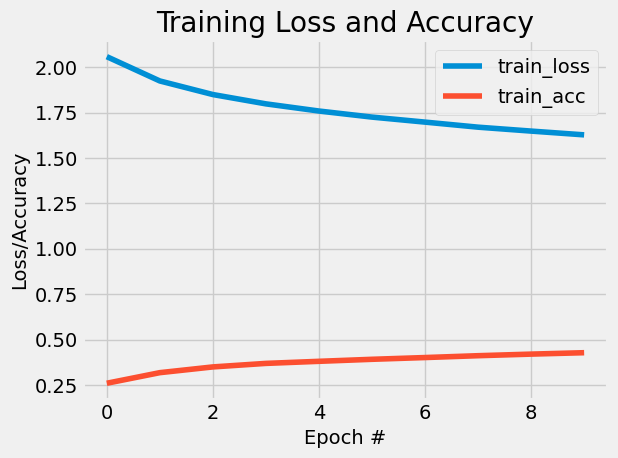

In [14]:
# plotting history of the model
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [16]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test_dataset, batch_size=32)

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step


In [17]:
predictions

array([[0.02997407, 0.00423702, 0.13314049, ..., 0.07631389, 0.01457447,
        0.00331133],
       [0.04329535, 0.058397  , 0.00133574, ..., 0.00134995, 0.5135928 ,
        0.3763333 ],
       [0.332678  , 0.04446041, 0.01440103, ..., 0.07327048, 0.35521796,
        0.12895736],
       ...,
       [0.00218883, 0.00113675, 0.11923396, ..., 0.03049029, 0.01008433,
        0.00458059],
       [0.03331311, 0.03229885, 0.11780398, ..., 0.06029521, 0.03830311,
        0.02145722],
       [0.03321382, 0.02316994, 0.13113032, ..., 0.48490897, 0.00874642,
        0.01851716]], dtype=float32)

In [18]:
# creating classifictation report
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1000
           1       0.59      0.36      0.45      1000
           2       0.38      0.22      0.28      1000
           3       0.32      0.20      0.25      1000
           4       0.31      0.46      0.37      1000
           5       0.41      0.35      0.38      1000
           6       0.38      0.52      0.44      1000
           7       0.35      0.63      0.45      1000
           8       0.53      0.48      0.50      1000
           9       0.47      0.53      0.50      1000

    accuracy                           0.41     10000
   macro avg       0.43      0.41      0.40     10000
weighted avg       0.43      0.41      0.40     10000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too